# TensorFlow Basics

## Customizing your Plots

In [1]:
#[optional] Customizing your plots: https://matplotlib.org/users/customizing.html
#__________________________________________________
import matplotlib
font = {'weight': 'bold',
        'size': 16}
matplotlib.rc('font', **font)

#[for .ipynb only]
#__________________________________________________
%matplotlib inline           
from IPython import display  

## Least Square regression: a start-up example

In [2]:
#%% e.g. Least Square regression

import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

19 -1.775 [ 0.00030558  0.00030558  0.00030558  0.00030558  0.00030558]


'\nsess = tf.Session()\nsess.run(tf.global_variables_initializer())\n    \n    for step in range(20):\n        sess.run(train_step, feed_dict={x:X, y:Y})\n        #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration\n        if step%5 == 0:\n            Y_= sess.run(y_, feed_dict={x:X, y:Y})\n\n            plt.gca().cla() \n            plt.scatter(X, Y, label="x")\n            plt.plot(X, Y_, \'b\', label="y")\n            display.display(plt.gcf()) \n            display.clear_output(wait=True)\n            time.sleep(0.2) \n'

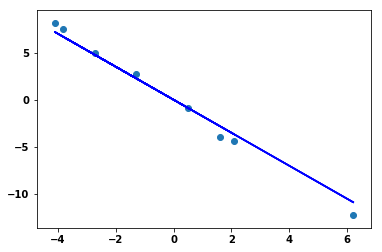

In [4]:
# Data
X = np.array([[2.1],[1.6],[-3.8],[0.5],[-4.1],[-1.3],[-2.7],[6.2]])
Y = np.array([[-4.4],[-3.9],[7.5],[-0.9],[8.1],[2.7],[4.9],[-12.2]])

# Define your Graph
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

b = tf.Variable(tf.zeros([5]))   
w = tf.Variable(tf.zeros([1, 1]))

y_= w * x + b

# Loss & Optimizer
loss = tf.reduce_mean(tf.square(y_ - y))
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)

# Training (you have to start a tf.Session())
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(20):
        Loss, _ = sess.run([loss, train_step], feed_dict={x:X, y:Y})  #evaluate "loss" & training 
        print(step, '%2.3f'%sess.run(w)[0][0], sess.run(b))           #display model params <*1> <*2>
        if step % 2 == 0:
            Y_ = sess.run(y_, feed_dict={x:X, y:Y})
            plt.gca().cla()                                           #for .ipynb display only
            plt.scatter(X, Y, label="x")
            plt.plot(X, Y_, 'b', label="y")
            display.display(plt.gcf())                                #for .ipynb display only
            display.clear_output(wait=True)                           #for .ipynb display only
            time.sleep(0.2)                                           #for .ipynb display only

# An alternative way to work within tf.Session(): "with tf.Session() as sess:"
'''
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
    for step in range(20):
        sess.run(train_step, feed_dict={x:X, y:Y})
        #print(step, sess.run(w), sess.run(b)) #You may print loss of each iteration
        if step % 2 == 0:
            Y_= sess.run(y_, feed_dict={x:X, y:Y})

            plt.gca().cla() 
            plt.scatter(X, Y, label="x")
            plt.plot(X, Y_, 'b', label="y")
            display.display(plt.gcf()) 
            display.clear_output(wait=True)
            time.sleep(0.2) 
'''

# <*1>: You can also do: 
#           print(step, w.eval(session=sess), b.eval(session=sess))
#       Ref: http://blog.csdn.net/zcf1784266476/article/details/70259676 
# <*2>: Note that: "sess.run(w)[0][0]" happens when you are evaluating a scalar